# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Filip Holmberg

Vem du har presenterat för: Shangchanhui Feng, Maya Sobh, Xiaoyong Yang.

Datum då du presenterade: 2024-05-08

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [2]:
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


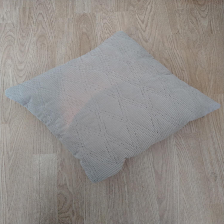

In [75]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
# img_path = 'tennisboll.jpg'

# img_path = 'penna.jpg'
# img_path = 'kopp.jpg'
img_path = 'kudde.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [76]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [77]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [78]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
print(x)
x = preprocess_input(x)
print(x)

[[[[159. 150. 145.]
   [159. 150. 145.]
   [159. 151. 148.]
   ...
   [119. 104.  97.]
   [105.  92.  83.]
   [113. 104.  97.]]

  [[157. 148. 143.]
   [160. 151. 146.]
   [163. 155. 152.]
   ...
   [123. 108. 101.]
   [ 98.  85.  76.]
   [110. 101.  94.]]

  [[159. 150. 145.]
   [162. 153. 148.]
   [156. 148. 145.]
   ...
   [126. 113. 105.]
   [113. 100.  94.]
   [114. 106.  95.]]

  ...

  [[147. 144. 139.]
   [155. 152. 147.]
   [154. 151. 146.]
   ...
   [132. 123. 118.]
   [139. 134. 128.]
   [127. 122. 116.]]

  [[151. 148. 143.]
   [152. 149. 144.]
   [155. 150. 146.]
   ...
   [139. 130. 125.]
   [138. 129. 124.]
   [137. 128. 123.]]

  [[149. 146. 141.]
   [147. 144. 139.]
   [154. 149. 145.]
   ...
   [137. 128. 123.]
   [134. 125. 120.]
   [134. 125. 120.]]]]
[[[[ 41.060997   33.221      35.32     ]
   [ 41.060997   33.221      35.32     ]
   [ 44.060997   34.221      35.32     ]
   ...
   [ -6.939003  -12.778999   -4.6800003]
   [-20.939003  -24.779     -18.68     ]
   [ -

In [79]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted: [('n03485794', 'handkerchief', 0.760941), ('n03887697', 'paper_towel', 0.1612845), ('n02808304', 'bath_towel', 0.04776686)]


# 1. Take some pictures yourself and predict their class.

In [55]:
img_list = ['zebra.jpg','linjal.jpg','tennisboll.jpg','penna.jpg','kopp.jpg','kudde.jpg']

img_predict_list = []

for img in img_list:
    img_path = img
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_predict_list.append(x)

In [56]:
for index, item in enumerate(img_predict_list):

    preds = model.predict(item)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])
    print('Correct prediction:', img_list[index]) 
    # Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted: [('n02391049', 'zebra', 0.98622894), ('n02423022', 'gazelle', 0.0033235946), ('n01798484', 'prairie_chicken', 0.0032109865)]
Correct prediction: zebra.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted: [('n03777754', 'modem', 0.62299514), ('n04118776', 'rule', 0.14351219), ('n03494278', 'harmonica', 0.077827506)]
Correct prediction: linjal.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted: [('n04409515', 'tennis_ball', 0.9999969), ('n04039381', 'racket', 2.7892713e-06), ('n03942813', 'ping-pong_ball', 5.5036338e-08)]
Correct prediction: tennisboll.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted: [('n04154565', 'screwdriver', 0.4262113), ('n04376876', 'syringe', 0.3098043), ('n03658185', 'letter_opener', 0.08495448)]
Correct prediction: penna.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted: [('n01943899', 'conch', 0.49775127), ('n01986214', 'hermit_crab', 0.21784952), ('n04423845', 'thimble', 0.050649527)]
Correct prediction: 

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

"Pretrained models" har fördelarna:
1. Stora mängder data för träning behövs inte eftersom modellen redan tränad.
2. Förmodligen har data (använd för träning) en stor mångfald, vilket leder till att modellen blir bättre jmf med om man använder egen data. 
3. Det går snabbt att ladda och använda modellen jmf med att träna modellen.